un supervised machine learning (K_means) with Python 


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data Directory
file_path = '/content/drive/My Drive/Iris.csv'
data = pd.read_csv(file_path,lineterminator='\n')
print("Data imported successfully")

Data imported successfully


In [4]:
data.shape

(150, 6)

In [5]:
print(data.head(20))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

In [6]:
# Split-out validation dataset
array = data.values
X = array[:,0:4]


In [9]:
#Building the clustering model and calculating the values of the Distortion:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
mapping1 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	
	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	


In [10]:
#Tabulating and Visualizing the results
#Using the different values of Distortion:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 37.569102467109566
2 : 18.837761066495588
3 : 12.549987064911686
4 : 9.489126917038542
5 : 7.625745425716944
6 : 6.336003330606812
7 : 5.493540194048914
8 : 4.828225599432593
9 : 4.281441975137571


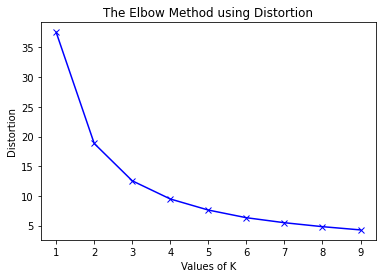

In [11]:
#ploting distortions curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


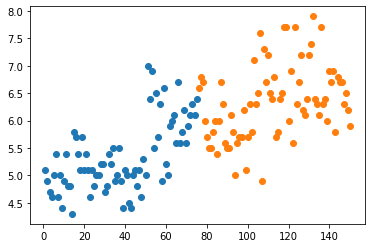

In [12]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

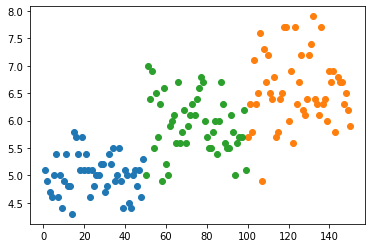

In [13]:
# define the model
model = KMeans(n_clusters=3)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()

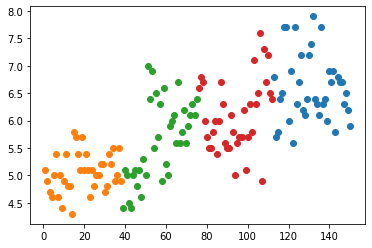

In [14]:
# define the model
model = KMeans(n_clusters=4)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.show()